<img src = "https://raw.githubusercontent.com/Bencool/MBA6636-Business-Analytics/main/research/G05%20PCA%20and%20Clustering/images/clustering_pca.jpg" alt = "PCA + Clustering + Python" />

# 0719 G05 Unsupervised Learning - Group 03

**Bin Liao, Lijie Yang, Ziyin Xu**

In this assignment, you will work collaboratively with your group members to complete tasks listed in this notebook. Each of you will take ownership of any one set and solve it. You are expected to study how other group members solved their set. It will help solve the subsequent I05 assignment. Please include your name in the respective header section to indicate which problem is solved by you.

**How to submit your assignment?**
You will submit the link to the Google colab of your group as your submnission on the D2L portal.

Note:
There is no rubric for this assignment. 2/3 weightage is for solving the problem and 1/3 for organizing and articulating your answer.
**If you have code which is unnecessary for answering the question you will lose marks. If you cannot explain why certain code is in your solution you will lose marks.**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Set 1 (Bin Liao)

Download the wine-clustering data file from [datasets](https://github.com/dearbharat/datasets) and upload it in a dataset repository in your github account. Import the dataset directly from your github respository in the dataframe. Perform the analysis in Q1 to Q4.

In [61]:
url = "https://raw.githubusercontent.com/Bencool/MBA6636-Business-Analytics/main/datas/wine-clustering.csv"
wine_clustering_df = pd.read_csv(url)

# analysize the  wine-clustring data
wine_clustering_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


1. Scale the data using standardization with scikit-learn library.

In [62]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(wine_clustering_df)


2. Use elbow method to find the optimal number of clusters.

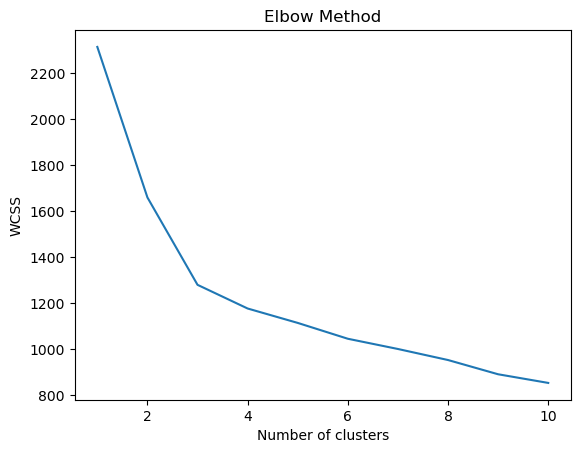

In [63]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the plot, it appears that the within-cluster sum of squares (WCSS) decreases significantly up to 3 clusters, after which the decrease is less pronounced. This suggests that 3 is a good choice for the number of clusters, which is consistent with your observation.

3. Build and implement the K-Means Clustering model using scikit-learn library.

In [64]:
from sklearn.cluster import KMeans

# Implement K-Means Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_scaled)


4. Visualize the clusters with their centroids using any visualization library.

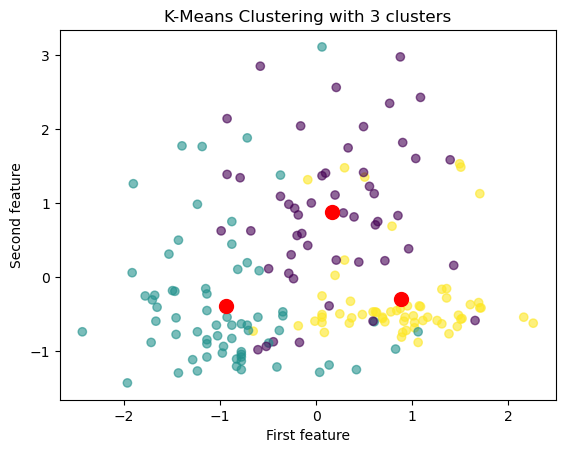

In [65]:
# Create a scatter plot of the data with points colored by cluster assigned
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=pred_y, cmap='viridis', alpha=0.6)

# Plot the cluster centroids in red with smaller size
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')

# Label the axes and add a title
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.title('K-Means Clustering with 3 clusters')

# Display the plot
plt.show()


Download the pca data file from [datasets](https://github.com/dearbharat/datasets) and upload it in a dataset repository in your github account. Import the dataset directly from your github respository in the dataframe. Perform the analysis in Q5 to Q8.

5. Check if there are any null values in the dataset. If yes,suitably replace them or remove from the dataset.

In [66]:
# Read the PCA csv file from the URL
url = "https://raw.githubusercontent.com/Bencool/MBA6636-Business-Analytics/main/datas/pca.csv"
pca_df = pd.read_csv(url)

# print few data.
pca_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [67]:
# Describe the data
pca_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,845.000000,840.000000,841.000000,839.000000,843.000000,845.000000,844.000000,844.000000,842.000000,845.000000,842.000000,843.000000,843.000000,841.000000,839.000000,844.000000,844.000000,845.000000
mean,93.688757,44.839286,82.129608,168.942789,61.686833,8.571598,168.959716,40.915877,20.586698,148.022485,188.688836,439.763938,174.761566,72.447087,6.370679,12.595972,188.922986,195.639053
std,8.233928,6.148277,15.777881,33.502667,7.892788,4.602302,33.191787,7.803566,2.591528,14.507907,31.384851,176.597634,32.569295,7.490621,4.920092,8.939445,6.158638,7.440675
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.500000,149.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,174.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [68]:
# Check for null values
print(pca_df.isnull().sum())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [69]:
# Drop the null data
pca_df = pca_df.dropna()

pca_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,93.667488,44.814039,82.062808,169.155172,61.783251,8.603448,168.623153,40.970443,20.562808,147.916256,188.437192,438.661330,174.305419,72.399015,6.358374,12.681034,188.982759,195.736453
std,8.233209,6.142665,15.782734,33.597099,7.974362,4.678348,33.058568,7.790355,2.571732,14.496749,31.138721,175.197918,32.316374,7.480572,4.920918,8.930502,6.156584,7.400603
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.500000,167.500000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.500000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.250000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


6. Standardize the data

(a) Choose input(X) and output(y) variables.  
(b) Standardized the data using scikit-learn library.

In [70]:
from sklearn.preprocessing import StandardScaler

# Choose input (X) and output (y) variables
X = pca_df.drop('class', axis=1)
y = pca_df['class']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



7. Compute and print covariance matrix, eigen vectors and eigen values using NumPy.

In [71]:
import numpy as np

np.set_printoptions(precision=3, suppress=True, linewidth=200)

# Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print the covariance matrix, eigenvalues, and eigenvectors
print("Covariance matrix:\n", cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)


Covariance matrix:
 [[ 1.001  0.69   0.791  0.688  0.09   0.15   0.815 -0.789  0.815  0.675  0.765  0.821  0.581 -0.259  0.231  0.17   0.296  0.373]
 [ 0.69   1.001  0.798  0.624  0.154  0.251  0.859 -0.826  0.857  0.966  0.807  0.852  0.937  0.049  0.14  -0.001 -0.115  0.048]
 [ 0.791  0.798  1.001  0.772  0.163  0.265  0.91  -0.914  0.898  0.774  0.867  0.893  0.706 -0.238  0.109  0.279  0.145  0.343]
 [ 0.688  0.624  0.772  1.001  0.668  0.452  0.744 -0.796  0.716  0.57   0.807  0.732  0.544 -0.176  0.043  0.18   0.376  0.471]
 [ 0.09   0.154  0.163  0.668  1.001  0.653  0.112 -0.19   0.086  0.132  0.29   0.1    0.135  0.173 -0.061 -0.04   0.23   0.257]
 [ 0.15   0.251  0.265  0.452  0.653  1.001  0.171 -0.182  0.167  0.309  0.331  0.149  0.196  0.309  0.015  0.042 -0.031  0.139]
 [ 0.815  0.859  0.91   0.744  0.112  0.171  1.001 -0.975  0.993  0.809  0.951  0.998  0.796 -0.046  0.068  0.229  0.009  0.137]
 [-0.789 -0.826 -0.914 -0.796 -0.19  -0.182 -0.975  1.001 -0.952 -0.771 -0.93

8. Implement PCA using scikit-learn library.

In [72]:
from sklearn.decomposition import PCA

#Fit PCA on the standardized data and capture 95% of the variance
pca = PCA(n_components=0.95)

# Fit the data
X_pca = pca.fit_transform(X_scaled)

# Print the number of components actually used
print(f"Number of components: {pca.n_components_}")

# Print the explained variance ratio for these components
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


Number of components: 7
Explained variance ratio: [0.524 0.166 0.106 0.065 0.052 0.03  0.02 ]


The output indicates that the PCA has selected 7 principal components to retain 95% of the variance in your data. The explained variance ratio for each of these components is also provided. Here's a brief explanation of these results:

1. **Number of components: 7** - This shows that PCA has identified 7 principal components in the dataset. These are the directions in the data that account for a maximal amount of variance, in descending order. In this case, since we had 7 variables in the original dataset, we have 7 components.

2. **Explained variance ratio:** [0.52425775 0.16598385 0.10648679 0.0648986 0.05160675 0.02956812 0.01995016] - This array shows the proportion of the dataset's total variance that is accounted for by each principal component. The values are in descending order, so the first component accounts for the most variance and the last component accounts for the least. Here's what each value represents:

- The first principal component accounts for approximately 52.43% of the total variance in the dataset.
- The second principal component accounts for approximately 16.60% of the total variance.
- The third principal component accounts for approximately 10.65% of the total variance.
- The fourth principal component accounts for approximately 6.49% of the total variance.
- The fifth principal component accounts for approximately 5.16% of the total variance.
- The sixth principal component accounts for approximately 2.96% of the total variance.
- The seventh principal component accounts for approximately 1.99% of the total variance.

What this tells us is that a large proportion of the variance in the dataset can be accounted for by just the first few components. For example, the first three components together account for roughly 79.68% of the total variance. This can be very helpful when we want to reduce the dimensionality of our data, as it means we can keep the majority of the useful information while discarding less important details. However, the specific threshold for how many components to keep will depend on the context and requirements of your specific use case.


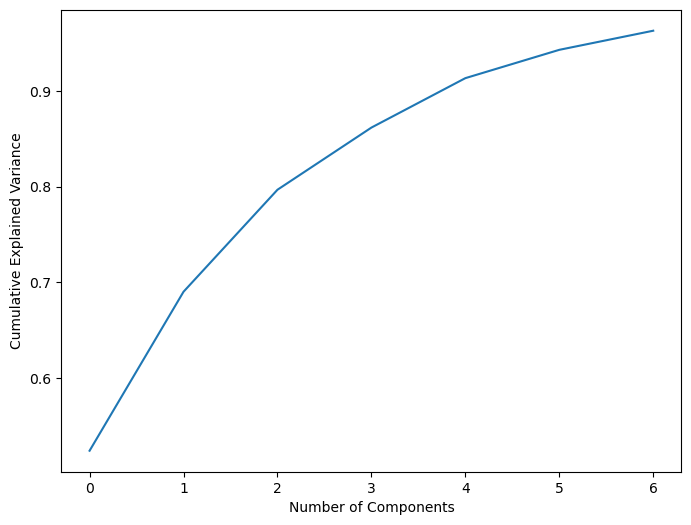

In [73]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

## Set 2 (First_Name Last_Name)

Download the segementation-data file from [datasets](https://github.com/dearbharat/datasets) and upload it in a dataset repository in your github account. Import the dataset directly from your github respository in the dataframe. Perform the analysis in Q1 to Q4.

1. Scale the data using standardization with scikit-learn library.

2. Use elbow method to find the optimal number of clusters.

3. Build and implement the K-Means Clustering model using scikit-learn library.

4. K-Means Clustering

(a) Find out the number of iterations required for k-means to converge. 

(b) Find out the silhouette score. 

(c) Plot the k-means score using any visualization library. (Hint: no. of clusters on x axis, silhouette coefficient on y axis)

Download the Iris data file from [datasets](https://github.com/dearbharat/datasets) and upload it in a dataset repository in your github account. Import the dataset directly from your github respository in the dataframe. Perform the analysis in Q5 to Q8.

5. Extract the variables (X) with numeric data.

6. Standardized the data using scikit-learn library.

7. Carry out PCA using scikit-learn library.

8. Visualize PCA using matplotlib. 

## Set 3 (First_Name Last_Name)

Download the Iris data file from [datasets](https://github.com/dearbharat/datasets) and upload it in a dataset repository in your github account. Import the dataset directly from your github respository in the dataframe. Perform the analysis in Q1 to Q4.

1. Extract the variables (X) with numeric data.

2. Standardized the data using scikit-learn library.

3. Carry out PCA using scikit-learn library.

4. Visualize PCA using matplotlib. 

Download the wine-clustering data file from [datasets](https://github.com/dearbharat/datasets) and upload it in a dataset repository in your github account. Import the dataset directly from your github respository in the dataframe. Perform the analysis in Q5 to Q8.

5. Scale the data using standardization with scikit-learn library.

6. Use elbow method to find the optimal number of clusters.

7. Build and implement the K-Means Clustering model using scikit-learn library.

8. Visualize the clusters with their centroids using any visualization library.

## Set 4 (First_Name Last_Name)
Download the pca data file from [datasets](https://github.com/dearbharat/datasets) and upload it in a dataset repository in your github account. Import the dataset directly from your github respository in the dataframe. Perform the analysis in Q1 to Q4.

1. Check if there are any null values in the dataset. If yes,suitably replace them or remove from the dataset.

2. Standardize Data

(a) Choose input(X) and output(y) variables.  
(b) Standardized the data using scikit-learn library.

3. Compute and print covariance matrix, eigen vectors and eigen values using NumPy.

4. Implement PCA using scikit-learn library.

Download the segementation-data file from [datasets](https://github.com/dearbharat/datasets) and upload it in a dataset repository in your github account. Import the dataset directly from your github respository in the dataframe. Perform the analysis in Q5 to Q8.

5. Scale the data using standardization with scikit-learn library.

6. Use elbow method to find the optimal number of clusters.

7. Build and implement the K-Means Clustering model using scikit-learn library.

8. K-Means Clustering

(a) Find out the number of iterations required for k-means to converge. 

(b) Find out the silhouette score. 

(c) Plot the k-means score using any visualization library. (Hint: no. of clusters on x axis, silhouette coefficient on y axis)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0396bd3d-5050-4c7c-9066-8077dbb9bdc2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>